In [95]:
%pip install matplotlib
%pip install numpy
%pip install geopandas matplotlib
%pip install pandas
%pip install seaborn
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [1]:

from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os as os
import joblib



In [3]:
#carichiamo i datafgrame con i csv che ci servono per il join per il clustering
df_appearances = pd.read_csv(r"C:\Users\nicol\OneDrive\Desktop\MAGISTRALE\DATA SCIENCE\Python\DataScience-Python\csv_post_etl\appearances_post.csv")
df_games = pd.read_csv(r"C:\Users\nicol\OneDrive\Desktop\MAGISTRALE\DATA SCIENCE\Python\DataScience-Python\csv_post_etl\games_post.csv")
df_players = pd.read_csv(r"C:\Users\nicol\OneDrive\Desktop\MAGISTRALE\DATA SCIENCE\Python\DataScience-Python\csv_post_etl\players_post.csv")

In [7]:
# calcoliamo per ogni giocatore la sua età, andando a creare una nuova colonna nella tabella players


data_attuale = datetime.now()

# elimina i valori nulli su data di nascita


df_players.dropna(subset=['date_of_birth'], inplace=True)

df_players['date_of_birth'] = pd.to_datetime(df_players['date_of_birth'])

df_players['eta'] = ((data_attuale - df_players['date_of_birth']).dt.days / 365.25).astype(int)

# filtriamo anche per i giocatori ancora in attivita ovvero quelli per cui l ultima stagione è la 2023 o suepriore
df_players = df_players[df_players['last_season'] >= 2023]


,player_id,yellow_cards,red_cards,goals,assists,minutes_played,position,height_in_cm
player_id,,,,,,,,
3333,3333,68,1,38,69,25435,Midfield,175.0


In [8]:
# facciamo il join tra le 3 tabelle 

df1 = df_games.merge(df_appearances, on='game_id')
df_finale = df1.merge(df_players, on='player_id')





,player_id,yellow_cards,red_cards,goals,assists,minutes_played,position,height_in_cm
player_id,,,,,,,,
3333,3333,65,1,36,66,24571,Midfield,175.0


In [101]:
# andiamno ad eliminare le colonne date x e competition id x che sono duplicate. Eliminiamo anche colonne che non ci interessano per il clustering

elimino = ["date_x", "competition_id_x", "home_club_id", "away_club_id", "home_club_goals", "away_club_goals", "home_club_position", "away_club_position", "home_club_manager_name", "away_club_manager_name",
           "stadium", "attendance", "referee", "home_club_name", "away_club_name", "aggregate", "appearance_id", "player_club_id", "player_current_club_id", "competition_id_y", "name", 
           "last_season", "current_club_id", "player_code", "city_of_birth", "country_of_citizenship", "contract_expiration_date", "agent_name", "current_club_domestic_competition_id",
           "current_club_name", "highest_market_value_in_eur", "date_of_birth", "game_id", "season", "round", "competition_type",  "date_y", "sub_position"]
df_finale.drop(columns = elimino, inplace = True)




,player_id,player_name,yellow_cards,red_cards,goals,assists,minutes_played,country_of_birth,position,foot,height_in_cm,market_value_in_eur,eta
0,48067,Artem Dzyuba,0,0,0,0,75,UdSSR,Attack,right,197.0,3000000.0,35
1,48067,Artem Dzyuba,1,0,0,0,90,UdSSR,Attack,right,197.0,3000000.0,35
2,48067,Artem Dzyuba,0,0,0,0,89,UdSSR,Attack,right,197.0,3000000.0,35
3,48067,Artem Dzyuba,0,0,0,0,90,UdSSR,Attack,right,197.0,3000000.0,35
4,48067,Artem Dzyuba,0,0,2,0,90,UdSSR,Attack,right,197.0,3000000.0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
613460,442784,Rangel,0,0,0,0,8,Brazil,Attack,right,185.0,200000.0,29
613461,937918,Ruslan Nepeypiev,0,0,0,0,26,Ukraine,Attack,right,178.0,100000.0,20
613462,297373,Mike Hauptmeijer,0,0,0,0,47,Netherlands,Goalkeeper,left,190.0,75000.0,26
613463,724106,Luca Lipani,0,0,0,0,30,Italy,Midfield,right,185.0,4000000.0,18


In [102]:
df_aggregato = df_finale.groupby('player_id').agg({
    'player_name': 'first',
    'yellow_cards': 'sum',
    'red_cards': 'sum',
    'goals': 'sum',
    'assists': 'sum',
    'minutes_played': 'sum',
    'country_of_birth': 'first',
    'position': 'first',
    'foot': 'first',
    'height_in_cm': 'first',
    'market_value_in_eur': 'first',
    'eta': 'first' 
}).reset_index()



,player_id,player_name,yellow_cards,red_cards,goals,assists,minutes_played,country_of_birth,position,foot,height_in_cm,market_value_in_eur,eta
0,3333,James Milner,65,1,36,66,24571,England,Midfield,right,175.0,1000000.0,38
1,4391,Boy Waterman,4,2,0,2,10473,Netherlands,Goalkeeper,right,188.0,75000.0,39
2,5336,Anastasios Tsokanis,41,0,6,6,19090,Greece,Midfield,left,176.0,450000.0,32
3,7161,Jonas Hofmann,13,0,54,58,17778,Germany,Midfield,right,176.0,13000000.0,31
4,7825,Pepe Reina,17,1,0,2,29055,Spain,Goalkeeper,right,188.0,700000.0,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6174,1163778,Kahveh Zahiroleslam,1,0,1,1,493,United States,Attack,right,193.0,400000.0,21
6175,1166093,Georgios Konstantakopoulos,1,0,1,2,265,Sconosciuto,Midfield,both,182.0,100000.0,19
6176,1173042,Djibi Seck,0,0,0,0,26,Sconosciuto,Attack,right,181.0,150000.0,19
6177,1176345,Mahamadou Nagida,0,0,0,0,173,Cameroon,Defender,left,176.0,150000.0,18


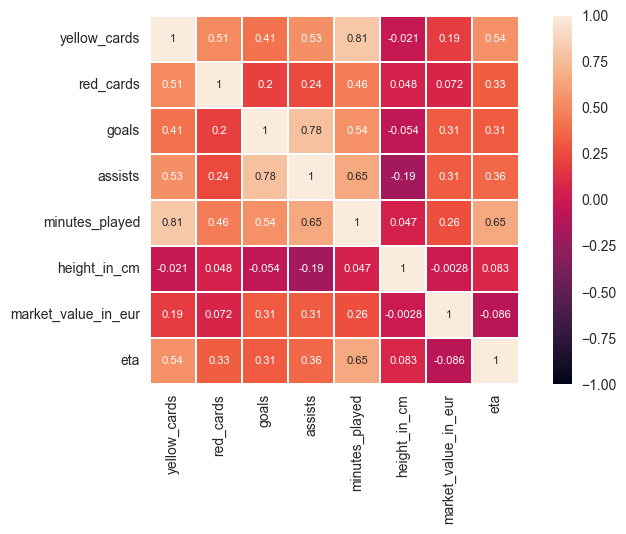

['dataframe_processato.joblib']

In [103]:

# andiamo a creare un dataframe con le colonne che ci servono per studiare la correlazione tra le feature. Togliamo anche quei campi che non sono nuerici
df_corr = df_aggregato[['yellow_cards', 'red_cards', 'goals', 'assists',  'minutes_played', 'height_in_cm', 'market_value_in_eur', "eta"]]


#formato del testo
annot_kws = {"size": 8}

sns.heatmap(df_corr.corr(), vmax=1, vmin=-1,square=True, annot=True, linewidths=.2, cbar=True, annot_kws=annot_kws)

plt.tight_layout()
plt.savefig("../../images/correlazione_preprocessing.png")
plt.show()

# salviamo il dataframe per poi usarlo negli altri file
 
# Salva il DataFrame con joblib

joblib.dump(df_corr, 'dataframe_processato.joblib')
